# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала синус. Для небольших $x$:

$$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N (-1)^n \frac{x^{2n+1}}{(2n+1)!} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [2]:
import math

ITERATIONS = 20

def my_sin(x):
    """
    Вычисление синуса при помощи частичного суммирования
    ряда Тейлора для окрестности 0
    """
    x_pow = x
    multiplier = 1
    partial_sum = x
    for n in range(1, ITERATIONS):
        x_pow *= x**2  # В цикле постепенно считаем степень
        multiplier *= -1 / (2*n) / (2*n + 1)  # (-1)^n и факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum

help(math.sin)
help(my_sin)

print(math.sin(0.4))
print(my_sin(0.4))

Help on built-in function sin in module math:

sin(x, /)
    Return the sine of x (measured in radians).

Help on function my_sin in module __main__:

my_sin(x)
    Вычисление синуса при помощи частичного суммирования
    ряда Тейлора для окрестности 0

0.3894183423086505
0.38941834230865047


выходит у нас немного неточно, но зато...

... Зато наша функция умеет считать синус комплексного аргумента, легко достигающий пяти и более в мирное время. Мнимая единица ($i$) в Питоне обозначется, как `j`.

Стандартная библиотека тоже умеет, **и поточнее**.

In [ ]:
import cmath

complex_angle = cmath.asin(5)
print('"Угол", на котором синус достигает пяти:', complex_angle)

print("Достигает ли пяти наш синус?", my_sin(complex_angle))
print("А библиотечный?", cmath.sin(complex_angle))

А какое и где слабое место у нашего синуса?

C:\Users\Home\AppData\Local\Temp\ipykernel_15264\4150393263.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


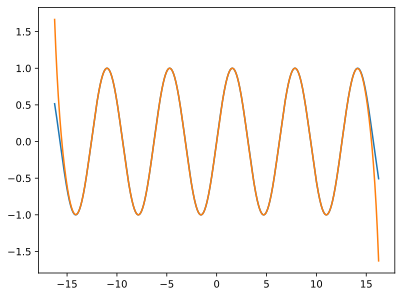

In [3]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


import matplotlib.pyplot as plt
import numpy as np

vs = np.vectorize(my_sin)
print(vs)

angles = np.r_[-16.25:16.25:0.01]
plt.plot(angles, np.sin(angles))
plt.plot(angles, vs(angles))
plt.show()

# Задание

Реализовать вычисление частичной суммы [ряда Тейлора для одной из элементарных функций](http://ru.math.wikia.com/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0) (кроме синуса 😸), аналогичным образом «испытать» получившиеся функции. 

Help on built-in function exp in module math:

exp(x, /)
    Return e raised to the power of x.

Help on function my_exp in module __main__:

my_exp(x_arg)
    Вычисление экспоненты при помощи частичного суммирования
    ряда Тейлора

Результат, встроенной функции: 148.4131591025766
Результат, написанной функции: 148.41315910257657


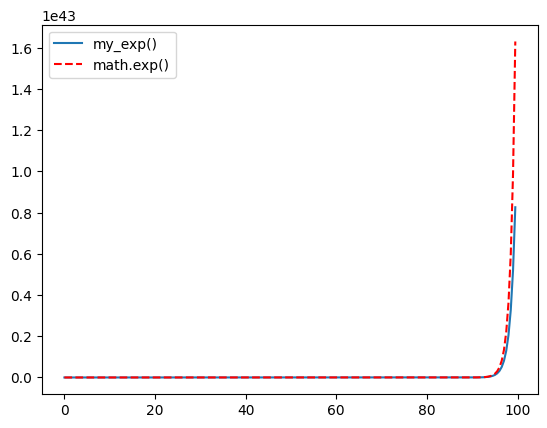

In [2]:
"""
Вычисление экспоненты двумя функциями и вывод полученных значений
"""
import math
import matplotlib.pyplot as plt
import numpy as np

"""Рисование графика"""


def graph(start, end):
    arguments = np.arange(start, end, 0.5)
    plt.plot(  # функция для отображения графика
       arguments,
       [my_exp(a) for a in arguments], label='my_exp()')

    plt.plot(  # функция для отображения графика
       arguments,
       [math.exp(a) for a in arguments], '--r', label='math.exp()')
    plt.legend()
    plt.show()


def my_exp(x_arg):
    """
    Вычисление экспоненты при помощи частичного суммирования
    ряда Тейлора
    """
    exp_res = 0
    for i in range(0, 100):
        exp_res += (x_arg**i)/math.factorial(i)
    return exp_res


help(math.exp)
help(my_exp)

print("Результат, встроенной функции:", math.exp(5))
print("Результат, написанной функции:", my_exp(5))
graph(0, 100)
